### <font color='red'> NOTE: Please do not edit this file.</font> Go to <font color='white'>*File > Save a copy in Drive*</font>.

# **Course: Sistemas Inteligentes 2025**
### **Lab05: Regresión Logística**

---


Este es el quinto laboratorio relacionado con naive bayes y arboles de decisión para el curso **Sistemas Inteligentes 2025**.

En este notebook aprenderás el uso de los algoritmos naive bayes y arboles de decisión.

- Make a copy of this folder into your own machine and/or to your Google Drive and/or github.

In [1]:
!pip install seaborn scikit-learn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score,
                             confusion_matrix, classification_report)

# Paso 1: Cargar el conjunto de datos

In [4]:


import pandas as pd

#Accediendo al dataset existente en github
url = 'https://raw.githubusercontent.com/evalcas/AILabs-Lab05/refs/heads/main/diabetes.csv'


# Cargar el dataset
df = pd.read_csv(url) # Ruta relativa o completa en tu entorno

# Mostrar las primeras filas
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Paso 2: Exploración inicial de los datos

In [5]:
# Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Estadísticas descriptivas
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Valores nulos
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# Verificar ceros en columnas clínicas
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())


# Paso 3: Análisis de correlación

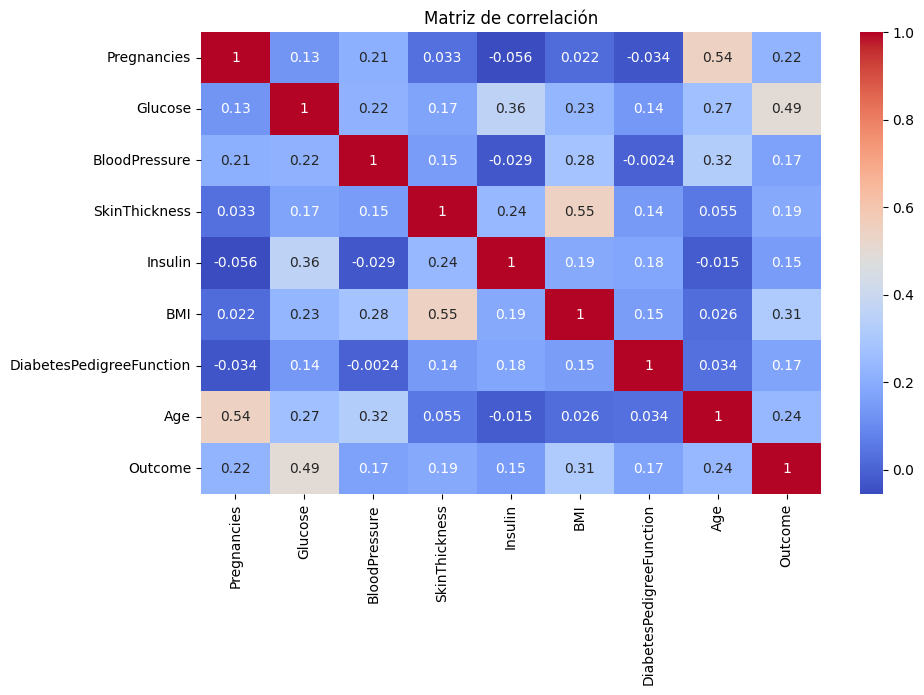

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


# Paso 4: Selección de variables y separación de datos

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# Paso 5: Entrenamiento del modelo

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


# Paso 6: Evaluación del modelo

Accuracy : 0.70
Precision: 0.58
Recall   : 0.52
F1 Score : 0.55


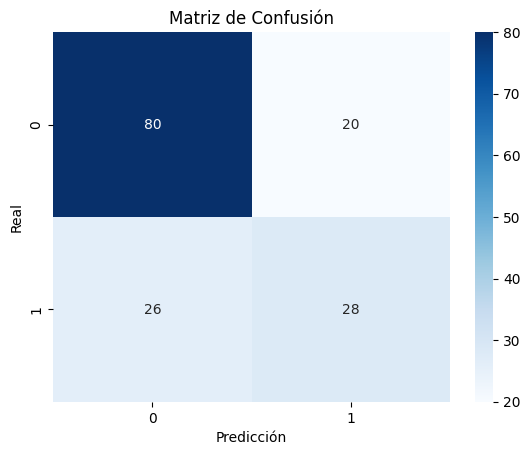

In [12]:
# Métricas clásicas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


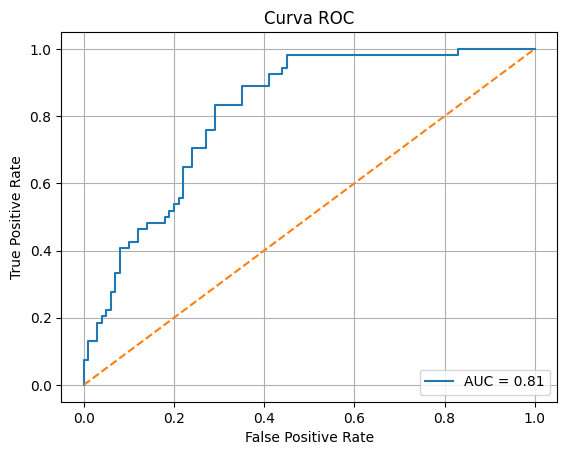

In [13]:
# Curvas ROC Y AOC
# Calcular curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [14]:
# ANALISIS DE LA EFICIENCIA DEL MODELO
print("Análisis del modelo:\n")

print(f"- Precisión general (Accuracy): {acc:.2f}")
print(f"- Capacidad de detectar positivos reales (Recall): {rec:.2f}")
print(f"- Equilibrio entre precisión y recall (F1-score): {f1:.2f}")
print(f"- Área bajo la curva ROC (AUC): {auc:.2f}")

if acc > 0.75 and auc > 0.80:
    print("\n✅ El modelo muestra un rendimiento aceptable y podría usarse como herramienta de apoyo al diagnóstico.")
elif acc > 0.65:
    print("\n⚠️ El modelo tiene rendimiento moderado. Puede mejorarse con técnicas como normalización, selección de características o modelos más complejos.")
else:
    print("\n❌ El modelo no es eficiente. No debe usarse para tomar decisiones clínicas.")


Análisis del modelo:

- Precisión general (Accuracy): 0.70
- Capacidad de detectar positivos reales (Recall): 0.52
- Equilibrio entre precisión y recall (F1-score): 0.55
- Área bajo la curva ROC (AUC): 0.81

⚠️ El modelo tiene rendimiento moderado. Puede mejorarse con técnicas como normalización, selección de características o modelos más complejos.


# Naive bayes y arboles de decisión
# Paso 9: NAIVE BAYES


=== Naive Bayes ===
              precision    recall  f1-score   support

           0     0.7789    0.7400    0.7590       100
           1     0.5593    0.6111    0.5841        54

    accuracy                         0.6948       154
   macro avg     0.6691    0.6756    0.6715       154
weighted avg     0.7019    0.6948    0.6976       154



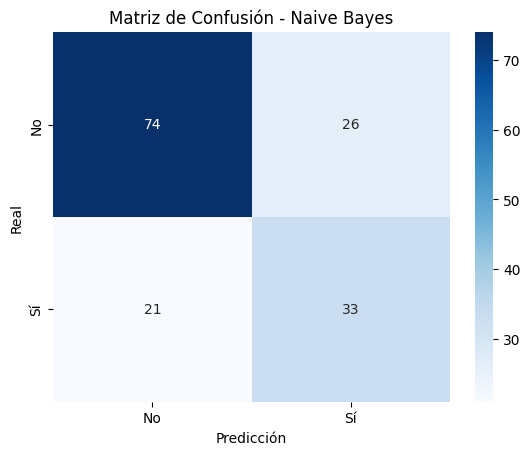

=== Árbol de Decisión ===
              precision    recall  f1-score   support

           0     0.7248    0.7900    0.7560       100
           1     0.5333    0.4444    0.4848        54

    accuracy                         0.6688       154
   macro avg     0.6291    0.6172    0.6204       154
weighted avg     0.6576    0.6688    0.6609       154



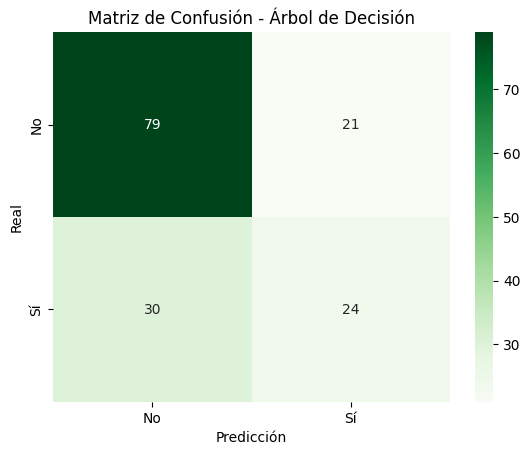

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----- Modelo 1: Naive Bayes -----
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, digits=4))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# ----- Modelo 2: Árbol de Decisión -----
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("=== Árbol de Decisión ===")
print(classification_report(y_test, y_pred_tree, digits=4))

cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Curvas ROC y AUC para Naive Bayes y Árbol de Decisión

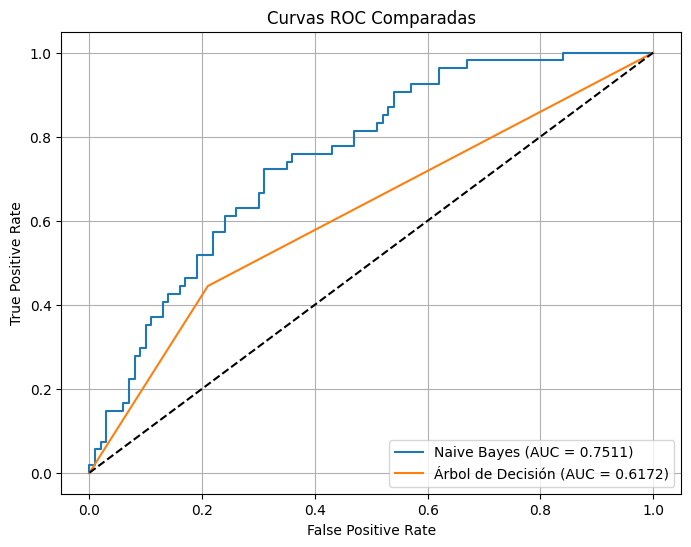

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades para el cálculo de ROC
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Calcular fpr, tpr y AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)

auc_nb = roc_auc_score(y_test, y_proba_nb)
auc_tree = roc_auc_score(y_test, y_proba_tree)

# Graficar curvas ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})')
plt.plot(fpr_tree, tpr_tree, label=f'Árbol de Decisión (AUC = {auc_tree:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC Comparadas')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Interpretando los modelos
## 🧪 Comparación de Modelos: Naive Bayes vs Árbol de Decisión

A continuación se presentan los resultados de aplicar dos modelos de clasificación (Naive Bayes y Árbol de Decisión) al dataset de diabetes. El objetivo es comparar su rendimiento utilizando métricas de evaluación estándar.

### 📊 Métricas de Desempeño

| Métrica              | Naive Bayes | Árbol de Decisión |
|----------------------|-------------|-------------------|
| Accuracy             | 69.48%      | 66.88%            |
| Precision (clase 1)  | 55.93%      | 53.33%            |
| Recall (clase 1)     | 61.11%      | 44.44%            |
| F1-score (clase 1)   | 58.41%      | 48.48%            |
| AUC-ROC              | **0.7511**  | 0.6172            |

> Nota: La clase 1 representa a los pacientes con diagnóstico de diabetes, por lo tanto es la clase positiva.

---

### 📈 Análisis de la Curva ROC

- **Naive Bayes**: Tiene una curva ROC que se aleja claramente de la diagonal aleatoria, con un área bajo la curva (AUC) de **0.7511**, lo que indica una buena capacidad para distinguir entre clases.
- **Árbol de Decisión**: Su curva ROC es más cercana a la diagonal, con un AUC de **0.6172**, indicando una capacidad de clasificación más débil.

Una AUC superior a 0.7 se considera razonablemente buena, por lo tanto el modelo Naive Bayes muestra un mejor rendimiento general.

---

### 🔍 Interpretación General

- **Naive Bayes** supera al Árbol de Decisión en todas las métricas clave: precisión, recall, F1-score, y AUC.
- Específicamente, el **recall de la clase positiva** (capacidad para detectar correctamente pacientes con diabetes) es considerablemente más alto en Naive Bayes (61.11%) en comparación con el Árbol (44.44%).
- En problemas de salud como este, un alto *recall* es crítico para minimizar los **falsos negativos** (pacientes con diabetes no detectados).

---

### ✅ Conclusión

Basado en las métricas y la curva ROC, se concluye que **Naive Bayes es el modelo más adecuado** para este conjunto de datos, al ofrecer un mejor equilibrio entre precisión y sensibilidad, especialmente en el diagnóstico correcto de pacientes con diabetes.
